In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#export train and test data
#assign FIPS as an index
data = pd.read_csv('data_train.csv')
data.index=data.FIPS
data.drop('FIPS',axis=1,inplace=True)

data_test = pd.read_csv('data_test.csv')
data_test.index=data_test.FIPS
data_test.drop('FIPS',axis=1,inplace=True)

data.head()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,GROCPTH07,SUPERCPTH07,CONVSPTH07,SPECSPTH07,SNAPSPTH08,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,PCT_OBESE_ADULTS10
FIPS,,,,,,,,,,,,,,,,,,,,,
17057,12.447050,3.967083,2.816930,2.249617,2.106049,0.190057,0.000000,0.950286,0.027151,0.719526,...,18.052820,20.915050,40749,14.5,0,19.4,0,0,0,30.3
19103,16.736065,3.717899,4.097261,1.784079,1.467352,0.207112,0.007966,1.011662,0.047795,0.317999,...,8.565731,19.802570,51014,17,0,12.5,0,1,0,24.0
5135,20.678178,8.833366,3.741109,6.442812,4.012840,0.225505,0.056376,1.353027,0.000000,0.612503,...,23.945783,21.530352,28933,25.1,0,39.3,1,0,0,30.3
29019,32.164619,11.618021,6.755868,2.513050,1.878729,0.144439,0.013131,1.030772,0.078785,0.366096,...,9.266979,21.059136,42202,18.8,0,16.6,0,1,0,25.7
38047,95.832377,31.416795,20.430822,27.035329,4.116095,0.512295,0.000000,2.049180,0.512295,0.519481,...,27.989950,21.105528,38380,14.4,0,19.4,0,0,1,34.8


### Description of the columns with the variable types is below


- Index|FieldName|Type|Unit|Description
-------|---------|----|-----------
- 0|PCT_LACCESS_POP10|Percent|float|Population, low access to store (%), 2010
- 1|PCT_LACCESS_LOWI10|Percent|float|Low income & low access to store (%), 2010
- 2|PCT_LACCESS_CHILD10|Percent|float|Children, low access to store (%), 2010
- 3|PCT_LACCESS_SENIORS10|Percent|float|Seniors, low access to store (%), 2010
- 4|PCT_LACCESS_HHNV10|Percent|float|Households, no car & low access to store (%), 2010
- 5|GROCPTH07|# per 1,000 pop|float|Grocery stores/1,000 pop, 2007
- 6|SUPERCPTH07|# per 1,000 pop|float|Supercenters & club stores/1,000 pop, 2007
- 7|CONVSPTH07|# per 1,000 pop|float|Convenience stores/1,000 pop, 2007
- 8|SPECSPTH07|# per 1,000 pop|float|Specialized food stores/1,000 pop, 2007
- 9|SNAPSPTH08|# per 1,000 pop|float|SNAP-authorized stores/1,000 pop, 2008
- 10|WICSPTH08|# per 1,000 pop|float|WIC-authorized stores/1,000 pop, 2008
- 11|FFRPTH07|# per 1,000 pop|float|Fast-food restaurants/1,000 pop, 2007
- 12|FSRPTH07|# per 1,000 pop|float|Full-service restaurants/1,000 pop, 2007
- 13|PC_FFRSALES07|Dollars|float|Expenditures per capita, fast food, 2007 (State level)
- 14|PC_FSRSALES07|Dollars|float|Expenditures per capita, restaurants, 2007 (State level)
- 15|PCT_SNAP09|Percent|float|SNAP participants (% pop), 2009  (State level)
- 16|SNAP_PART_RATE10|Percent|float|SNAP participants (% eligible pop), 2010  (State level)
- 17|SNAP_OAPP10|Classification|float (0, 0.5 or 1)|SNAP online application, 2010  (State level)
- 18|SNAP_FACEWAIVER10|Classification|float (0, 0.5 or 1)|SNAP face interview waiver, 2010  (State level)
- 19|SNAP_VEHEXCL10|Classification|integer (0 or 1)|SNAP vehicle exclusion, 2010  (State level)
- 20|SNAP_BBCE10|Classification|integer (0 or 1)|SNAP Broad-based Categorical Eligibility, 2010  (State level)
- 21|SNAP_REPORTSIMPLE10|Classification|integer (0 or 1)|SNAP simplified reporting, 2010  (State level)
- 22|PCT_NSLP09|Percent|float|National School Lunch Program participants (% pop), 2009  (State level)
- 23|PCT_FREE_LUNCH10|Percent|float|Students eligible for free lunch (%), 2010
- 24|PCT_REDUCED_LUNCH10|Percent|float|Students eligible for reduced-price lunch (%), 2010
- 25|PCT_SBP09|Percent|float|School Breakfast Program participants (% pop), 2009  (State level)
- 26|PCT_SFSP09|Percent|float|Summer Food Service Program participants (% pop), 2009  (State level)
- 27|PCT_WIC09|Percent|float|WIC participants (% pop), 2009  (State level)
- 28|PCT_CACFP09|Percent|float|Child & Adult Care (% pop), 2009  (State level)
- 29|FOODINSEC_07_09|Percent|float|Household food insecurity (%, three-year average), 2007-09  (State level)
- 30|VLFOODSEC_07_09|Percent|float|Household very low food security (%, three-year average), 2007-09  (State level)
- 31|FOODINSEC_CHILD_01_07|Percent|float|Child food insecurity (% households, multiple-year average), 2001-07  (State level)
- 32|MILK_PRICE10|Ratio|float|Price of low-fat milk/national average, 2010 (Region level)
- 33|SODA_PRICE10|Ratio|float|Price of sodas/national average, 2010  (Region level)
- 34|MILK_SODA_PRICE10|Ratio|float|Price of low-fat milk/price of sodas, 2010  (Region level)
- 35|PCT_LOCLFARM07|Percent|float|Farms with direct sales (%), 2007
- 36|FMRKTPTH09|# per 1,000 pop|float|Farmers' markets/1,000 pop, 2009
- 37|VEG_FARMS07|Count|integer|Vegetable farms, 2007
- 38|FRESHVEG_FARMS07|Count|integer|Farms with vegetables harvested for fresh market, 2007
- 39|ORCHARD_FARMS07|Count|integer|Orchard farms, 2007
- 40|BERRY_FARMS07|Count|integer|Berry farms, 2007
- 41|SLHOUSE07|Count|integer|Small slaughterhouse facilities, 2007
- 42|GHVEG_FARMS07|Count|integer|Greenhouse vegetable and fresh herb farms, 2007
- 43|CSA07|Count|integer|CSA farms, 2007
- 44|AGRITRSM_OPS07|Count|integer|Agritourism operations
- 45|FARM_TO_SCHOOL|Classification|integer (0 or 1)|Farm to school program, 2009
- 46|RECFACPTH07|# per 1,000 pop|float|Recreation & fitness facilities/1,000 pop, 2007
- 47|NATAMEN|Legend|integer|ERS natural amenity index, 1999
- 48|PCT_NHWHITE10|Percent|float|% White, 2010
- 49|PCT_NHBLACK10|Percent|float|% Black, 2010
- 50|PCT_HISP10|Percent|float|% Hispanic, 2010
- 51|PCT_NHASIAN10|Percent|float|% Asian, 2010
- 52|PCT_NHNA10|Percent|float|% American Indian or Alaska Native, 2010
- 53|PCT_NHPI10|Percent|float|% Hawaiian or Pacific Islander, 2010
- 54|PCT_65OLDER10|Percent|float|% Population 65 years or older, 2010
- 55|PCT_18YOUNGER10|Percent|float|% Population under age 18, 2010
- 56|MEDHHINC10|Dollars|integer|Median household income, 2010
- 57|POVRATE10|Percent|float|Poverty rate, 2010
- 58|PERPOV10|Legend|integer (0 or 1)|Persistent-poverty counties, 2010
- 59|CHILDPOVRATE10|Percent|float|Child poverty rate, 2010
- 60|PERCHLDPOV10|Legend|integer (0 or 1)|Persistent-child-poverty counties, 2010
- 61|METRO13|Legend|integer (0 or 1)|Metro/nonmetro counties, 2010
- 62|POPLOSS00|Legend|integer (0 or 1)|Population-loss counties, 2000
- 63|PCT_OBESE_ADULTS10|Percent|float|Adult obesity rate (county), 2010

# *EDA on Train Dataset*.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 17057 to 51840
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCT_LACCESS_POP10      2357 non-null   float64
 1   PCT_LACCESS_LOWI10     2357 non-null   float64
 2   PCT_LACCESS_CHILD10    2357 non-null   float64
 3   PCT_LACCESS_SENIORS10  2357 non-null   float64
 4   PCT_LACCESS_HHNV10     2357 non-null   float64
 5   GROCPTH07              2357 non-null   float64
 6   SUPERCPTH07            2357 non-null   float64
 7   CONVSPTH07             2357 non-null   float64
 8   SPECSPTH07             2357 non-null   float64
 9   SNAPSPTH08             2357 non-null   float64
 10  WICSPTH08              2357 non-null   float64
 11  FFRPTH07               2354 non-null   float64
 12  FSRPTH07               2354 non-null   float64
 13  PC_FFRSALES07          2357 non-null   float64
 14  PC_FSRSALES07          2357 non-null   float64
 15 

In [4]:
# drop rows with null vales
data.dropna(axis= 0,inplace=True)

In [5]:
# several columns (MEDHHINC10, POVRATE10, CHILDPOVRATE10, PERCHLDPOV10) 
# convert columns with type 'object' info float and coers invalid values to NaN
data[['MEDHHINC10','POVRATE10','CHILDPOVRATE10',
      'POPLOSS00']]=data[['MEDHHINC10',
                          'POVRATE10','CHILDPOVRATE10','POPLOSS00']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [6]:
data[['MEDHHINC10','POVRATE10','CHILDPOVRATE10','POPLOSS00']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 17057 to 5051
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MEDHHINC10      2253 non-null   int64  
 1   POVRATE10       2253 non-null   float64
 2   CHILDPOVRATE10  2253 non-null   float64
 3   POPLOSS00       2253 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 88.0 KB


In [7]:
# Summary Table - transpose for ease of reading
summary_table = data.describe().transpose()
summary_table

,count,mean,std,min,25%,50%,75%,max
PCT_LACCESS_POP10,2253.0,22.884722,19.334220,0.0,10.741424,19.401001,28.946664,100.000001
PCT_LACCESS_LOWI10,2253.0,8.074257,7.759924,0.0,3.409245,6.107436,10.130099,72.274456
PCT_LACCESS_CHILD10,2253.0,5.332851,4.585524,0.0,2.383706,4.393517,6.868396,34.015595
PCT_LACCESS_SENIORS10,2253.0,3.862513,4.127223,0.0,1.590391,2.805166,4.486883,27.946309
PCT_LACCESS_HHNV10,2253.0,3.025946,2.097046,0.0,1.640771,2.578616,3.764840,29.507523
...,...,...,...,...,...,...,...,...
CHILDPOVRATE10,2253.0,24.086418,8.922472,4.2,17.400000,23.500000,29.900000,61.100000
PERCHLDPOV10,2253.0,0.227696,0.419439,0.0,0.000000,0.000000,0.000000,1.000000
METRO13,2253.0,0.373280,0.483783,0.0,0.000000,0.000000,1.000000,1.000000
POPLOSS00,2253.0,0.190413,0.392714,0.0,0.000000,0.000000,0.000000,1.000000


# Check for Outliers

In [8]:
# check the response variable distribution
data['PCT_OBESE_ADULTS10'].describe()

count    2253.000000
mean       30.577408
std         4.147914
min        13.200000
25%        28.400000
50%        30.800000
75%        33.000000
max        47.900000
Name: PCT_OBESE_ADULTS10, dtype: float64

Text(0.5, 1.0, 'Obesity Rates, %')

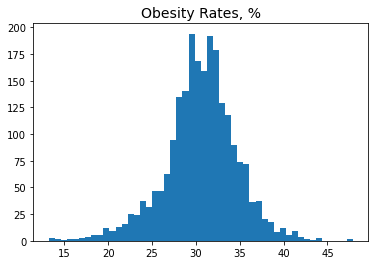

In [9]:
plt.hist(data['PCT_OBESE_ADULTS10'],bins=50)
plt.title('Obesity Rates, %', size = 14)

In [10]:
# calculate bottom and top values for 3 STD from the mean for the outcome variable
bottom_border=data['PCT_OBESE_ADULTS10'].mean()-3*data['PCT_OBESE_ADULTS10'].std()
top_border=data['PCT_OBESE_ADULTS10'].mean()+3*data['PCT_OBESE_ADULTS10'].std()
print (bottom_border)
print (top_border)

18.133667355374023
43.02114844578008


In [11]:
outliers = data[(data['PCT_OBESE_ADULTS10']<bottom_border) | (data['PCT_OBESE_ADULTS10']>top_border)]['PCT_OBESE_ADULTS10'].sort_values()
outliers

FIPS
8037     13.2
8107     13.4
35049    13.8
8097     14.2
8117     14.5
8013     14.9
6041     15.4
8051     15.9
8015     16.2
8019     16.6
8113     16.9
8007     17.0
36119    17.2
8045     17.4
30031    17.5
8021     17.7
25001    18.0
28103    43.6
1085     43.8
28133    43.9
38085    44.3
28027    47.4
1063     47.9
Name: PCT_OBESE_ADULTS10, dtype: float64

### There are 23 rows with outliers in the outcome variable in the train data set

In [12]:
# Access and Proximity to Grocery Store variable
data.iloc[:,:5].corr()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10
PCT_LACCESS_POP10,1.000000,0.908437,0.965992,0.928583,0.034298
PCT_LACCESS_LOWI10,0.908437,1.000000,0.882470,0.852606,0.202966
PCT_LACCESS_CHILD10,0.965992,0.882470,1.000000,0.842699,0.017263
PCT_LACCESS_SENIORS10,0.928583,0.852606,0.842699,1.000000,0.045465
PCT_LACCESS_HHNV10,0.034298,0.202966,0.017263,0.045465,1.000000


#### All  'Access and Proximity' predictor variables with the exception of PCT_LACCESS_HHNV10 are highly correlated

Text(0.5, 1.0, 'Access to Stores')

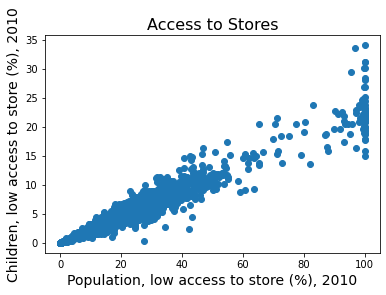

In [13]:
# create a scatter plot for two variables with high correlation
plt.scatter(data.PCT_LACCESS_POP10, data.PCT_LACCESS_CHILD10)
plt.xlabel('Population, low access to store (%), 2010',size = 14)
plt.ylabel('Children, low access to store (%), 2010',size = 14)
plt.title('Access to Stores', size=16)

Text(0, 0.5, 'Adult obesity rate (%)')

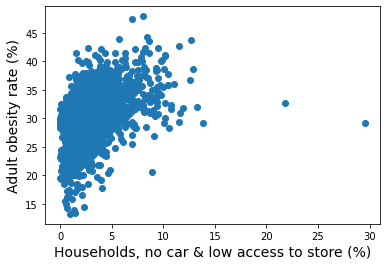

In [14]:
plt.scatter(data.PCT_LACCESS_HHNV10, data.PCT_OBESE_ADULTS10)
plt.xlabel('Households, no car & low access to store (%)', size = 14)
plt.ylabel('Adult obesity rate (%)', size = 14)

In [15]:
# Run correlations with all variables
# see the top 10 predicotrs (i.e. highest correlation with the outcome variable)

corr = data.corr()
corr['PCT_OBESE_ADULTS10'].sort_values(ascending=False).head(6)

PCT_OBESE_ADULTS10    1.000000
PCT_FREE_LUNCH10      0.496426
PCT_SNAP09            0.464713
CHILDPOVRATE10        0.459830
POVRATE10             0.452709
PCT_NHBLACK10         0.411699
Name: PCT_OBESE_ADULTS10, dtype: float64

Text(0, 0.5, 'Adult obesity rate (%)')

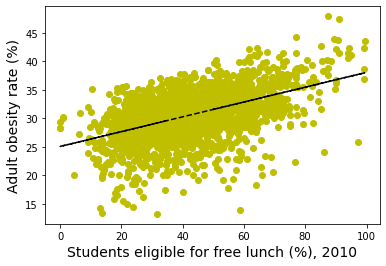

In [16]:
# create scatterplot of the most correlated variable
fit = np.polyfit(data.PCT_FREE_LUNCH10,data.PCT_OBESE_ADULTS10,1)
fit_fn = np.poly1d(fit) 

plt.plot(data.PCT_FREE_LUNCH10,data.PCT_OBESE_ADULTS10, 'yo', data.PCT_FREE_LUNCH10, fit_fn(data.PCT_FREE_LUNCH10), '--k')
plt.xlabel('Students eligible for free lunch (%), 2010', size=14)
plt.ylabel('Adult obesity rate (%)', size=14)

In [17]:
# compute the average of obesity rate for Persistent-poverty counties predictor
data.groupby(['PERPOV10'])[['PCT_OBESE_ADULTS10']].mean()

,PCT_OBESE_ADULTS10
PERPOV10,
0,30.068082
1,34.639841


In [18]:
# compute the average of obesity rate for Persistent-child-poverty counties counties
data.groupby(['PERCHLDPOV10'])[['PCT_OBESE_ADULTS10']].mean()

,PCT_OBESE_ADULTS10
PERCHLDPOV10,
0,29.791954
1,33.241520


In [19]:
data.head()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,GROCPTH07,SUPERCPTH07,CONVSPTH07,SPECSPTH07,SNAPSPTH08,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,PCT_OBESE_ADULTS10
FIPS,,,,,,,,,,,,,,,,,,,,,
17057,12.447050,3.967083,2.816930,2.249617,2.106049,0.190057,0.000000,0.950286,0.027151,0.719526,...,18.052820,20.915050,40749,14.5,0,19.4,0,0,0,30.3
19103,16.736065,3.717899,4.097261,1.784079,1.467352,0.207112,0.007966,1.011662,0.047795,0.317999,...,8.565731,19.802570,51014,17.0,0,12.5,0,1,0,24.0
5135,20.678178,8.833366,3.741109,6.442812,4.012840,0.225505,0.056376,1.353027,0.000000,0.612503,...,23.945783,21.530352,28933,25.1,0,39.3,1,0,0,30.3
29019,32.164619,11.618021,6.755868,2.513050,1.878729,0.144439,0.013131,1.030772,0.078785,0.366096,...,9.266979,21.059136,42202,18.8,0,16.6,0,1,0,25.7
38047,95.832377,31.416795,20.430822,27.035329,4.116095,0.512295,0.000000,2.049180,0.512295,0.519481,...,27.989950,21.105528,38380,14.4,0,19.4,0,0,1,34.8


## Check for multicollinearity


In [20]:
corr=data.iloc[:,:-1].corr()

In [21]:
# get eigen values for predictor variables
w, v = np.linalg.eig(corr)
eigen_val=pd.DataFrame({'feature':corr.columns,'epigen_value':w})
eigen_val

,feature,epigen_value
0,PCT_LACCESS_POP10,9.618749
1,PCT_LACCESS_LOWI10,6.861235
2,PCT_LACCESS_CHILD10,4.867373
3,PCT_LACCESS_SENIORS10,3.634000
4,PCT_LACCESS_HHNV10,2.764372
...,...,...
58,PERPOV10,0.303745
59,CHILDPOVRATE10,0.323831
60,PERCHLDPOV10,0.337743
61,METRO13,0.346907


In [22]:
# get predictors with eigen values close to zero
low_eigen = eigen_val[eigen_val.epigen_value < 0.01]

In [23]:
low_eigen 

,feature,epigen_value
25,PCT_SBP09,0.000562
26,PCT_SFSP09,0.001560
27,PCT_WIC09,0.007699


In [24]:
# Get vecors for features with eigen values close to zero
columns=data.columns.values[:-1]

vectors = pd.DataFrame({'Feature':columns})

for i in low_eigen.feature.values:
    index = low_eigen[low_eigen.feature == i].index
    vectors[i]=v[:,index]
vectors.head()

,Feature,PCT_SBP09,PCT_SFSP09,PCT_WIC09
0,PCT_LACCESS_POP10,-0.009215,-0.003063,0.800440
1,PCT_LACCESS_LOWI10,0.002483,-0.004091,-0.046247
2,PCT_LACCESS_CHILD10,0.002910,0.006473,-0.489472
3,PCT_LACCESS_SENIORS10,0.001815,-0.001399,-0.311843
4,PCT_LACCESS_HHNV10,0.003949,0.002466,-0.004536


In [25]:
# get features with eigen vectors that are NOT close to zero (i.e. strongly correlated with each other)
vectors.iloc[:,1:]=vectors.iloc[:,1:].abs()

In [26]:
# For each vector print features that have high collinearity
d={}
for i in range(1,len(vectors.columns)):
    d['collinear{0}'.format(i)] = vectors[vectors.iloc[:,i]>0.01].iloc[:,[0,i]]
    print (vectors[vectors.iloc[:,i]>0.01].iloc[:,[0,i]])
    print ("XXX")

              Feature  PCT_SBP09
15         PCT_SNAP09   0.012875
22         PCT_NSLP09   0.020085
25          PCT_SBP09   0.023164
29    FOODINSEC_07_09   0.017457
30    VLFOODSEC_07_09   0.016663
32       MILK_PRICE10   0.016374
33       SODA_PRICE10   0.010165
34  MILK_SODA_PRICE10   0.017982
48      PCT_NHWHITE10   0.685627
49      PCT_NHBLACK10   0.504695
50         PCT_HISP10   0.465546
51      PCT_NHASIAN10   0.078198
52         PCT_NHNA10   0.221595
XXX
                  Feature  PCT_SFSP09
12               FSRPTH07    0.011004
13          PC_FFRSALES07    0.023562
14          PC_FSRSALES07    0.019566
16       SNAP_PART_RATE10    0.014434
21    SNAP_REPORTSIMPLE10    0.010075
22             PCT_NSLP09    0.024869
25              PCT_SBP09    0.013373
27              PCT_WIC09    0.013641
28            PCT_CACFP09    0.012205
29        FOODINSEC_07_09    0.027119
31  FOODINSEC_CHILD_01_07    0.021195
32           MILK_PRICE10    0.644886
33           SODA_PRICE10    0.283242
34

In [27]:
# Collinear variables can be tested to identify the best predictor and drop the rest of them
d['collinear1'].head()

,Feature,PCT_SBP09
15,PCT_SNAP09,0.012875
22,PCT_NSLP09,0.020085
25,PCT_SBP09,0.023164
29,FOODINSEC_07_09,0.017457
30,VLFOODSEC_07_09,0.016663


### Summary

- **Records with the response variable = NULL were removed from the dataset**

- **Numerical columns that contained string values were converted to foat and string values were converted to NULLs**

- **Response variable ("Obesity rate") follows the normal distribution. Outliers are present on both bottom and top end of the value range of thee standard deviations**

- **Many predicor variables have outliers: *need to check if removing outliers will improve model preformace**

- **Some of the predictor variables are highly correlated**

- **Multicollinearity test (using eigenvalues and eigenvectors) returned sets of collinear variables: *test and remove collinear features**

### Initial findings

- **Counties with high poverty rates have ~5% higher obesity rates than counties with lower poverty rates as was stated in the hypothesis**

- **Percent of students in a County eligible for free lunch had the strongest correlation with a predictor variable**

# Modeling

### Benchmark:

In [28]:
# Set a benchmark for linear regression model - MSE
y_mean = data['PCT_OBESE_ADULTS10'].mean()
MSE_benchmark = ((data['PCT_OBESE_ADULTS10'] - y_mean)**2).mean()
print("Performance benchmark MSE = %f" %(MSE_benchmark))

Performance benchmark MSE = 17.197550


In [29]:
# convert columns with type 'object' info float and coers invalid values to NaN
data_test[['MEDHHINC10','POVRATE10','CHILDPOVRATE10',
      'POPLOSS00']]=data_test[['MEDHHINC10',
                          'POVRATE10','CHILDPOVRATE10','POPLOSS00']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [30]:
#drop rows with NULL values in predictor variable
data_test.dropna(subset=['PCT_OBESE_ADULTS10'],inplace=True)

In [31]:
# Fill zero instead of NULL values 
data_test.fillna(value=0,inplace=True)

In [32]:
# set a list of features for the model 
feature_cols = list(data.columns.values)[:-1]
X_train = data[feature_cols]
y_train = data['PCT_OBESE_ADULTS10']

X_test = data_test[feature_cols]
y_test = data_test['PCT_OBESE_ADULTS10']

In [33]:
print (len(X_train))
print (len(X_test))

2253
784


## Build a Random Forest Model to identify feature importance

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators = 100)

model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
features = X_train.columns

features_df = pd.DataFrame({'Features': features, 'Importance Score': model.feature_importances_.round(4)})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

# crete a table with top 20 featueres
top_20_rf = features_df['Features'].head(20)

print ("Features sorted by their Importance score:")
features_df.head(10)

Features sorted by their Importance score:


,Features,Importance Score
15,PCT_SNAP09,0.1292
23,PCT_FREE_LUNCH10,0.0985
47,NATAMEN,0.0880
49,PCT_NHBLACK10,0.0696
14,PC_FSRSALES07,0.0652
51,PCT_NHASIAN10,0.0460
22,PCT_NSLP09,0.0299
12,FSRPTH07,0.0272
9,SNAPSPTH08,0.0268
48,PCT_NHWHITE10,0.0199


### Top Ten Predictors with the Highest Importance Score (Random Forest Model, n=estimators=100:)

- Students eligible for free lunch (%), 2010
- SNAP participants (% pop), 2009*
- ERS natural amenity index, 1999
- % Black, 2010
- Expenditures per capita, restaurants ($), 2007*
- National School Lunch Program participants (% pop), 2009*
- % Asian, 2010
- Full-service restaurants/1,000 pop, 2007
- SNAP-authorized stores/1,000 pop, 2008
- % White, 2010

In [36]:
# 5 cross validation iterations
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=5,shuffle=True)

In [37]:
score = -np.mean(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
print ("Random Forest MSE on the train set: %f" %(score))

Random Forest MSE on the train set: 5.410264


In [38]:
# check how close the data are to the fitted regression line 
r2 = r2_score(y_test, model.predict(X_test))
print ("R-squared = %f" %(r2))

R-squared = 0.709040


Text(0.5, 1.0, 'Obesity Rates, %')

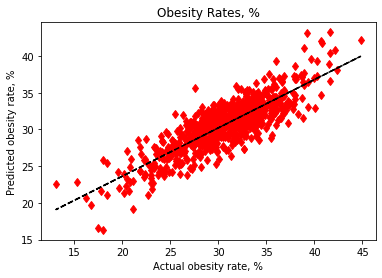

In [39]:
fit = np.polyfit(y_test,model.predict(X_test),1)
fit_fn = np.poly1d(fit) 

# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,model.predict(X_test), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
# get MSE for test data set
MSE_rf = mean_squared_error(y_test, model.predict(X_test))
MSE_rf

5.587452076530613

In [42]:
# Create performance score table to collect MSE resulrs for all tested models
Performance = pd.DataFrame({'Model': 'Random Forest', 'n_features': len(X_test.columns),'MSE':MSE_rf},index=[1])
Performance = Performance[['Model','n_features','MSE']]

# Linear Regression Model

## FOR LOOP for Linear Regression - feature testing 

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [45]:
# loop through the features by adding one feature each step starting with feature with the highest importance score (RF)

features = features_df.Features.values

feature_cols=[]
scores = []

y_train = data['PCT_OBESE_ADULTS10']
y_test = data_test['PCT_OBESE_ADULTS10']

for i in features:
    feature_cols.append(i)
    
    X_train=data[feature_cols]
    X_test=data_test[feature_cols]

    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train_std, y_train)
    
    score = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
    scores.append(score)

In [46]:
scores = pd.DataFrame(scores, index=range(1,len(features)+1),columns=["MSE"])
scores.index.name = 'N of Features'

Text(0, 0.5, 'MSE')

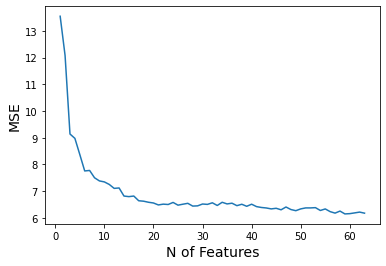

In [47]:
plt.plot(scores.index, scores.MSE)
plt.xlabel('N of Features', size = 14)
plt.ylabel('MSE', size = 14)

In [48]:
MSE_lr_all = mean_squared_error(y_test, lr.predict(X_test_std))
MSE_lr_all

11.291271137766596

In [49]:
Performance.loc[-1] = ['Linear Regression _all_features', len(X_test.columns), MSE_lr_all]
Performance.index = Performance.index + 1 

In [50]:
Performance

,Model,n_features,MSE
2,Random Forest,63,5.587452
0,Linear Regression _all_features,63,11.291271


Text(0.5, 1.0, 'Obesity Rates, %')

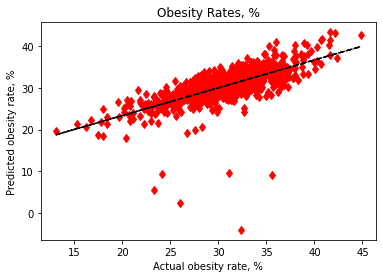

In [51]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

## Linear regression with top 80% features from Random Forest

In [52]:
# Take top 80% of features from Random Forest model by Importance Score

features_df['Running Sum']= features_df['Importance Score'].cumsum()

top_80pct_rf = features_df[features_df['Running Sum']<=0.8]
top_80pct_rf

,Features,Importance Score,Running Sum
15,PCT_SNAP09,0.1292,0.1292
23,PCT_FREE_LUNCH10,0.0985,0.2277
47,NATAMEN,0.0880,0.3157
49,PCT_NHBLACK10,0.0696,0.3853
14,PC_FSRSALES07,0.0652,0.4505
51,PCT_NHASIAN10,0.0460,0.4965
22,PCT_NSLP09,0.0299,0.5264
12,FSRPTH07,0.0272,0.5536
9,SNAPSPTH08,0.0268,0.5804
48,PCT_NHWHITE10,0.0199,0.6003


In [53]:
print ("Top 80 percent of features represent %d features" %(len(top_80pct_rf)))

Top 80 percent of features represent 23 features


In [54]:
feature_cols = top_80pct_rf.Features.values
feature_cols

array(['PCT_SNAP09', 'PCT_FREE_LUNCH10', 'NATAMEN', 'PCT_NHBLACK10',
       'PC_FSRSALES07', 'PCT_NHASIAN10', 'PCT_NSLP09', 'FSRPTH07',
       'SNAPSPTH08', 'PCT_NHWHITE10', 'MEDHHINC10', 'PCT_LOCLFARM07',
       'PC_FFRSALES07', 'PCT_NHNA10', 'PCT_HISP10', 'PCT_LACCESS_HHNV10',
       'PCT_18YOUNGER10', 'CONVSPTH07', 'FFRPTH07', 'PCT_SFSP09',
       'PCT_SBP09', 'RECFACPTH07', 'POVRATE10'], dtype=object)

In [55]:
# set a list of features for top 80% of features for Linear Regression model 
feature_cols = top_80pct_rf.Features.values

X_train = data[feature_cols]
X_test = data_test[feature_cols]

In [56]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

# transform training and test features
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [59]:
pd.DataFrame(zip(X_train.columns, lr.coef_), columns=['features', 'coefs']).sort_values('coefs')

,features,coefs
9,PCT_NHWHITE10,-5.311834
14,PCT_HISP10,-3.964666
3,PCT_NHBLACK10,-2.974288
13,PCT_NHNA10,-1.311271
7,FSRPTH07,-1.290828
5,PCT_NHASIAN10,-1.037938
2,NATAMEN,-0.736371
10,MEDHHINC10,-0.724758
20,PCT_SBP09,-0.594931
4,PC_FSRSALES07,-0.554699


In [60]:
MSE_lr = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
print ("Linear Regression MSE score on a train set: %f" %(MSE_lr))

Linear Regression MSE score on a train set: 6.532550


In [61]:
r2 = lr.score(X_test_std,y_test)
print ("R squared = %f" %(r2))

R squared = 0.570756


In [62]:
MSE_lr = -np.mean(cross_val_score(lr, X_test_std, y_test, scoring='neg_mean_squared_error', cv=cv))
print ("Linear Regression MSE score on a test set: %f" %(MSE_lr))

Linear Regression MSE score on a test set: 9.120051


In [63]:
Performance.loc[-1] = ['Linear Regression', len(X_test.columns), MSE_lr]
Performance.index = Performance.index + 1 

Text(0.5, 1.0, 'Obesity Rates, %')

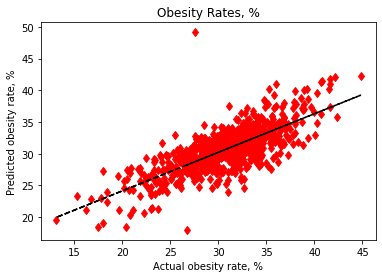

In [64]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

# Linear Regression with Outliers Removed

In [65]:
residuals = pd.DataFrame(X_train)
residuals['Predicted Response'] = lr.predict(X_train_std)
residuals['Actual Response'] = y_train
residuals['Residual'] = lr.predict(X_train_std) - y_train

In [66]:
residuals[(residuals['Residual']>7.5) | (residuals['Residual']<-8)].sort_values('Residual')

,PCT_SNAP09,PCT_FREE_LUNCH10,NATAMEN,PCT_NHBLACK10,PC_FSRSALES07,PCT_NHASIAN10,PCT_NSLP09,FSRPTH07,SNAPSPTH08,PCT_NHWHITE10,...,PCT_18YOUNGER10,CONVSPTH07,FFRPTH07,PCT_SFSP09,PCT_SBP09,RECFACPTH07,POVRATE10,Predicted Response,Actual Response,Residual
FIPS,,,,,,,,,,,,,,,,,,,,,
53015,11.422535,42.431590,5.0,0.558539,713.269544,1.437360,7.990853,0.646400,0.662320,85.758227,...,24.139244,0.805513,0.686178,0.622056,2.522735,0.069612,20.6,27.749701,36.7,-8.950299
53049,11.422535,41.253181,6.0,0.320268,713.269544,2.026769,7.990853,1.351477,0.913007,84.603250,...,17.915870,1.631093,1.211669,0.622056,2.522735,0.186411,17.9,26.611628,35.0,-8.388372
12125,10.531693,51.293292,4.0,21.828130,919.513104,0.205986,8.417276,0.203707,0.725365,71.599614,...,19.375603,0.271610,0.135805,0.689536,3.294967,0.000000,24.3,29.768513,38.0,-8.231487
24047,7.969081,35.408270,4.0,13.551910,728.913472,1.105842,7.590923,3.067796,0.449131,80.326117,...,18.313445,3.453810,1.889437,0.881467,2.707564,0.223482,10.6,24.090775,32.2,-8.109225
36119,11.886230,25.819735,4.0,13.337190,734.805659,5.386398,9.275093,0.955034,0.463765,57.375992,...,24.022429,1.030042,0.643380,2.234327,2.932285,0.197557,9.0,24.871071,17.2,7.671071
8037,6.350985,31.455399,5.0,0.465544,900.316210,0.990478,7.778858,2.392818,0.153790,67.254823,...,24.522482,2.412593,0.929442,0.254819,2.132226,0.158203,8.5,21.213847,13.2,8.013847
30031,9.482466,18.698098,5.0,0.309452,745.824351,1.129445,8.887485,1.225659,0.271864,93.332812,...,20.927686,1.225659,0.813288,0.688315,2.625055,0.137457,12.9,25.551088,17.5,8.051088
8021,6.350985,54.928704,6.0,0.145349,900.316210,0.218023,7.778858,0.374719,0.626566,41.799903,...,28.294574,0.374719,0.249813,0.254819,2.132226,0.000000,21.3,27.148071,17.7,9.448071
35049,14.483614,58.835500,5.0,0.656863,611.676120,1.088299,11.037727,1.143901,0.329064,43.900257,...,20.972463,1.143901,0.558001,2.156721,6.464342,0.118575,16.5,25.606071,13.8,11.806071


(-15.0, 15.0)

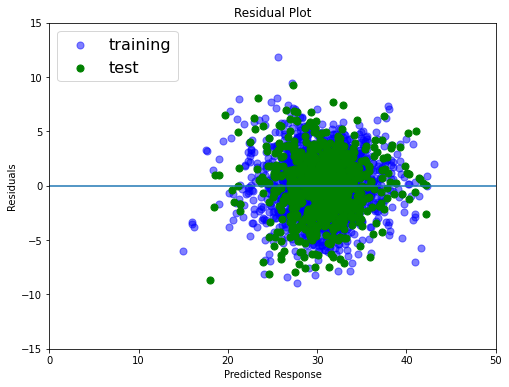

In [67]:
# create a resdidual plot to check for errors in the data
plt.figure(figsize=(8,6))
plt.scatter(lr.predict(X_train_std), lr.predict(X_train_std)-y_train, c='b', s=50, alpha=0.5, label='training')
plt.scatter(lr.predict(X_test_std), lr.predict(X_test_std)-y_test, c='g',s=50, label='test')
plt.legend(loc='upper left',prop={'size':16})
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.xlim(0,50)
plt.ylim(-15,15)

In [68]:
# Remove Response value outliers outside of the three STDs from the mean

feature_cols = top_80pct_rf.Features.values
X = data
X_test = data_test[feature_cols]


response_mean = y_train.mean()
response_std = y_train.std()

X = X[(X.PCT_OBESE_ADULTS10 >  (response_mean-3*response_std)) &
      (X.PCT_OBESE_ADULTS10 <  (response_mean+3*response_std))]

y_train = X['PCT_OBESE_ADULTS10']
X_train = X[feature_cols]

In [69]:
len(X_train)

2230

In [70]:
# transform training and test features

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [73]:
lr.coef_

array([ 0.91686374,  0.53714296, -0.66749568, -3.03200497, -0.51338281,
       -1.1065531 ,  0.29916532, -1.07264938,  0.18843324, -5.36805483,
       -0.60064487, -0.4550996 , -0.08134462, -1.32361971, -3.99156163,
        0.17416416,  0.43878705,  0.63504199, -0.18566402, -0.07907932,
       -0.60207509, -0.08438334, -0.25819849])

In [74]:
MSE_lr = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
print ("Linear Regression MSE score on a train set: %f" %(MSE_lr))

Linear Regression MSE score on a train set: 6.169952


In [75]:
Performance.loc[-1] = ['Linear Regression_no outliers', len(X_test.columns), MSE_lr]
Performance.index = Performance.index + 1 

Text(0.5, 1.0, 'Obesity Rates, %')

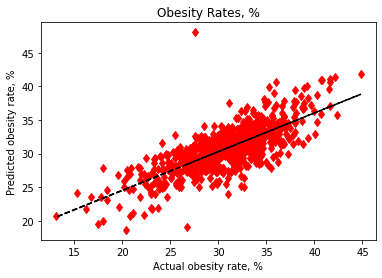

In [76]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

# MSE with outliers removed produced the best result

In [77]:
# rmove reponse variables outliers from data
response_mean = data['PCT_OBESE_ADULTS10'].mean()
response_std = data['PCT_OBESE_ADULTS10'].std()
print (response_mean)
print (response_std)

30.57740790057705
4.147913515067676


In [78]:
# rmove reponse variables outliers from data
data = data[(data.PCT_OBESE_ADULTS10 >  (response_mean-3*response_std)) &
      (data.PCT_OBESE_ADULTS10 <  (response_mean+3*response_std))]

In [79]:
# Get coefficients for collinear features

In [80]:
d['collinear1']

,Feature,PCT_SBP09
15,PCT_SNAP09,0.012875
22,PCT_NSLP09,0.020085
25,PCT_SBP09,0.023164
29,FOODINSEC_07_09,0.017457
30,VLFOODSEC_07_09,0.016663
32,MILK_PRICE10,0.016374
33,SODA_PRICE10,0.010165
34,MILK_SODA_PRICE10,0.017982
48,PCT_NHWHITE10,0.685627
49,PCT_NHBLACK10,0.504695


In [81]:
# update response variables to put back outliers
# y_train = data['PCT_OBESE_ADULTS10']
# y_test = data_test['PCT_OBESE_ADULTS10']

In [82]:
# loop through every colinera feature  (from multicillinearity test - eigen vectors)

columns = ['Feature','MSE']
scores = pd.DataFrame([])

for i in range(1,len(vectors.columns)):
    table = d['collinear{0}'.format(i)]
    features = table.Feature.values
    
    for f in features:
        feature_col = [f]
    
        X_train=data[feature_col]
    
        lr = LinearRegression()
        lr.fit(X_train, y_train)
    
        MSE  = -np.mean(cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
        score = pd.DataFrame({'Feature':f,'MSE':MSE},index=[0])
        scores = scores.append(score)
    print ("Best feature from collinear set %d" %(i))
    print (scores.sort_values('MSE').head(1))
    print ("------------------")

Best feature from collinear set 1
      Feature        MSE
0  PCT_SNAP09  12.007324
------------------
Best feature from collinear set 2
      Feature        MSE
0  PCT_SNAP09  12.007324
------------------
Best feature from collinear set 3
      Feature        MSE
0  PCT_SNAP09  11.994605
------------------


In [83]:
# check correlation between the best features out of collinear feature sets:
best_of_col = data[['CHILDPOVRATE10','PCT_FREE_LUNCH10']]
best_of_col.corr()

,CHILDPOVRATE10,PCT_FREE_LUNCH10
CHILDPOVRATE10,1.000000,0.821298
PCT_FREE_LUNCH10,0.821298,1.000000


# Test Linear Regression with all non-collinear Features and best feature out of collinear feature set

In [84]:
dfs = [d['collinear1'].Feature,d['collinear2'].Feature,d['collinear3'].Feature]
#append dataframes into one
from functools import reduce

collinear_feat = list(reduce(lambda left,right: left.append(right), dfs))

In [85]:
all_feat = list(data.columns[:-1])

In [86]:
non_collinear_feat = set(all_feat) - set(collinear_feat)

In [87]:
non_col_features = list(non_collinear_feat)

In [88]:
non_col_features.insert(0,"PCT_FREE_LUNCH10")

In [89]:
X_train = data[non_col_features]

X_test = data_test[non_col_features]

In [90]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [91]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression()

In [92]:
MSE_lr_non_col = mean_squared_error(y_test, lr.predict(X_test_std))
MSE_lr_non_col

10.65113941498713

# Lasso and Ridge

### Lasso with Gridsearch

In [93]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [94]:
feature_cols = list(data.columns.values)[:-1]

X_train = data[feature_cols]
X_test = data_test[feature_cols]

In [95]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [96]:
parameters = {'alpha' : np.linspace(0.0001,100,1000)}
lasso = Lasso()
clf = GridSearchCV(lasso, parameters, cv=cv)
clf.fit(X_train_std,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4575.262445368954, tolerance: 2.7548498004484308
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4357.449438937601, tolerance: 2.7160928139013456
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4367.192874309799, tolerance: 2.5838846165919285
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000e-04, 1.00200e-01, 2.00300e-01, 3.00400e-01, 4.00500e-01,
       5.00600e-01, 6.00700e-01, 7.00800e-01, 8.00900e-01, 9.01000e-01,
       1.00110e+00, 1.10120e+00, 1.20130e+00, 1.30140e+00, 1.40150e+00,
       1.50160e+00, 1.60170e+00, 1.70180e+00, 1.80190e+00, 1.90200e+00,...
       9.70971e+01, 9.71972e+01, 9.72973e+01, 9.73974e+01, 9.74975e+01,
       9.75976e+01, 9.76977e+01, 9.77978e+01, 9.78979e+01, 9.79980e+01,
       9.80981e+01, 9.81982e+01, 9.82983e+01, 9.83984e+01, 9.84985e+01,
       9.85986e+01, 9.86987e+01, 9.87988e+01, 9.88989e+01, 9.89990e+01,
       9.90991e+01, 9.91992e+01, 9.92993e+01, 9.93994e+01, 9.94995e+01,
       9.95996e+01, 9.96997e+01, 9.97998e+01, 9.98999e+01, 1.00000e+02])})

In [97]:
# get the best performing combo
clf.best_params_

{'alpha': 0.0001}

# Lasso with best alpha parameter

In [98]:
lasso = Lasso(alpha=0.0001)

In [99]:
lasso.fit(X_train_std, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5579.583887047891, tolerance: 3.372301478026906
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

In [100]:
MSE_las = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_las

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1351.7866126455465, tolerance: 1.2251985358851676
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.34834740562428, tolerance: 1.2223739744816586
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1423.9365970826589, tolerance: 1.204833792663477
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to

2.185776992722154

In [101]:
Performance.loc[-1] = ['Lasso (alpha=0.0001)', len(X_test.columns), MSE_las]
Performance.index = Performance.index + 1 

In [102]:
# get coefficients 
feature_coefs = pd.DataFrame({'Features':X_train.columns,'Coef':lasso.coef_})

In [103]:
feature_coefs.sort_values('Coef')

,Features,Coef
48,PCT_NHWHITE10,-5.089401
50,PCT_HISP10,-3.878897
49,PCT_NHBLACK10,-2.759006
32,MILK_PRICE10,-1.767292
27,PCT_WIC09,-1.181131
...,...,...
55,PCT_18YOUNGER10,0.624046
15,PCT_SNAP09,0.810399
29,FOODINSEC_07_09,0.842839
33,SODA_PRICE10,1.124104


In [104]:
feature_coefs['sort'] = feature_coefs.Coef.abs()
top_20_lasso = feature_coefs.sort_values('sort',ascending=False)['Features'].head(20)
feature_coefs.drop(['sort'],axis = 1, inplace=True)
top_20_lasso

48            PCT_NHWHITE10
50               PCT_HISP10
49            PCT_NHBLACK10
34        MILK_SODA_PRICE10
32             MILK_PRICE10
27                PCT_WIC09
52               PCT_NHNA10
33             SODA_PRICE10
51            PCT_NHASIAN10
31    FOODINSEC_CHILD_01_07
29          FOODINSEC_07_09
15               PCT_SNAP09
12                 FSRPTH07
56               MEDHHINC10
55          PCT_18YOUNGER10
37              VEG_FARMS07
38         FRESHVEG_FARMS07
47                  NATAMEN
23         PCT_FREE_LUNCH10
22               PCT_NSLP09
Name: Features, dtype: object

Text(0.5, 1.0, 'Obesity Rates, %')

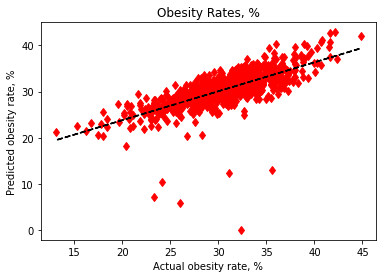

In [105]:
fit = np.polyfit(y_test,lasso.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,lasso.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [106]:
feature_coefs['Coef'] = feature_coefs['Coef'].abs()
feature_coefs.sort_values(by=['Coef'],ascending=False,inplace=True)

feature_test = feature_coefs.Features.values

In [107]:
Performance

,Model,n_features,MSE
5,Random Forest,63,5.587452
3,Linear Regression _all_features,63,11.291271
2,Linear Regression,23,9.120051
1,Linear Regression_no outliers,23,6.169952
0,Lasso (alpha=0.0001),63,2.185777


# Test variables in each category agains the response variable

In [108]:
# create lists with variable names for each category
access = list(data.columns.values)[0:5]
store_avail = list(data.columns.values)[5:11]
restaurant_avail = list(data.columns.values)[11:15]
food_assist = list(data.columns.values)[15:29]
food_insecureity = list(data.columns.values)[29:32]
food_price_tax = list(data.columns.values)[32:35]
local_foods = list(data.columns.values)[35:46]
health_physical = list(data.columns.values)[46:48]
socioec = list(data.columns.values)[48:63]

categories = [access,store_avail,restaurant_avail,food_assist,food_insecureity,
              food_price_tax,local_foods,health_physical,socioec]


lasso = Lasso(alpha=0.0001)
feature_cols = []
MSE_scores=[]

for i in categories:
    feature_cols = i
    
    X_train = data[feature_cols]
    X_test = data_test[feature_cols]

    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    
    lasso.fit(X_train_std, y_train)
    
    score = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_squared_error', cv=cv))
    MSE_scores.append(score)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5364.989388945498, tolerance: 3.372301478026906
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6060.54015514659, tolerance: 3.372301478026906
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2325.7378390992994, tolerance: 1.2418902041467306
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to in

In [109]:
categories = ['access','store_avail','restaurant_avail','food_assist','food_insecureity',
             'food_price_tax','local_foods','health_physical','socioec']
MSE_by_categoty = pd.DataFrame({'category':categories,'MSE':MSE_scores})
MSE_by_categoty.sort_values('MSE',ascending = True,inplace = True)
MSE_by_categoty

,category,MSE
3,food_assist,10.899344
8,socioec,11.291724
2,restaurant_avail,13.236739
1,store_avail,14.592162
7,health_physical,15.671545
6,local_foods,17.051784
5,food_price_tax,17.607320
4,food_insecureity,17.870157
0,access,21.114333


In [110]:
categories = MSE_by_categoty['category'].values

In [111]:
categories

array(['food_assist', 'socioec', 'restaurant_avail', 'store_avail',
       'health_physical', 'local_foods', 'food_price_tax',
       'food_insecureity', 'access'], dtype=object)

''

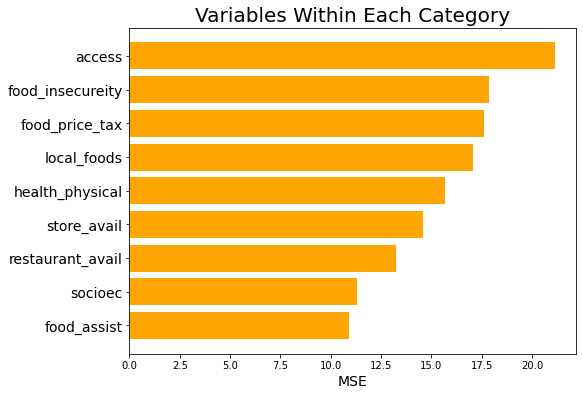

In [112]:
plt.figure(figsize = (8,6))

plt.barh(np.arange(len(MSE_by_categoty['category'])), MSE_by_categoty['MSE'], color='orange')
plt.xlabel('MSE',size=14)
plt.yticks(np.arange(len(categories)),categories,size=14)
plt.title('Variables Within Each Category',size=20)
;

# Try Lasso with non-collinear features


In [113]:
X_train = data[non_col_features] 
X_test = data_test[non_col_features] 

In [114]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [115]:
lasso = Lasso(alpha=0.0001)

In [116]:
lasso.fit(X_train_std, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560.1291807377274, tolerance: 3.372301478026906
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

In [117]:
# get coefficients 
feature_coefs = pd.DataFrame({'Features':X_train.columns,'Coef':lasso.coef_})

In [118]:
len(X_train.columns)

34

In [119]:
feature_coefs.sort_values('Coef')

,Features,Coef
12,NATAMEN,-1.346604
4,MEDHHINC10,-0.504755
11,PCT_LOCLFARM07,-0.498859
33,WICSPTH08,-0.291741
23,GHVEG_FARMS07,-0.262585
25,FARM_TO_SCHOOL,-0.231879
18,GROCPTH07,-0.192967
9,AGRITRSM_OPS07,-0.192231
16,RECFACPTH07,-0.172452
14,FFRPTH07,-0.171649


In [120]:
MSE_las_non_col = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_las_non_col

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.67331546593778, tolerance: 1.2251985358851676
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.61577345591922, tolerance: 1.2223739744816586
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 738.9672425814215, tolerance: 1.204833792663477
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to i

2.606125124079501

In [121]:
Performance.loc[-1] = ['Lasso_non collinear_features', len(X_test.columns), MSE_las_non_col]
Performance.index = Performance.index + 1 

In [122]:
Performance.sort_values('MSE')

,Model,n_features,MSE
1,Lasso (alpha=0.0001),63,2.185777
0,Lasso_non collinear_features,34,2.606125
6,Random Forest,63,5.587452
2,Linear Regression_no outliers,23,6.169952
3,Linear Regression,23,9.120051
4,Linear Regression _all_features,63,11.291271


# Ridge

In [123]:
X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

In [124]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [125]:
parameters = {'alpha' : np.linspace(0.0001,100,1000)}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=cv)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000e-04, 1.00200e-01, 2.00300e-01, 3.00400e-01, 4.00500e-01,
       5.00600e-01, 6.00700e-01, 7.00800e-01, 8.00900e-01, 9.01000e-01,
       1.00110e+00, 1.10120e+00, 1.20130e+00, 1.30140e+00, 1.40150e+00,
       1.50160e+00, 1.60170e+00, 1.70180e+00, 1.80190e+00, 1.90200e+00,...
       9.70971e+01, 9.71972e+01, 9.72973e+01, 9.73974e+01, 9.74975e+01,
       9.75976e+01, 9.76977e+01, 9.77978e+01, 9.78979e+01, 9.79980e+01,
       9.80981e+01, 9.81982e+01, 9.82983e+01, 9.83984e+01, 9.84985e+01,
       9.85986e+01, 9.86987e+01, 9.87988e+01, 9.88989e+01, 9.89990e+01,
       9.90991e+01, 9.91992e+01, 9.92993e+01, 9.93994e+01, 9.94995e+01,
       9.95996e+01, 9.96997e+01, 9.97998e+01, 9.98999e+01, 1.00000e+02])})

In [126]:
# get the best performing combo
clf.best_params_

{'alpha': 0.1002}

In [127]:
ridge=Ridge(alpha=0.1002)

In [128]:
ridge.fit(X_train_std, y_train)

Ridge(alpha=0.1002)

In [129]:
MSE_ridge = -np.mean(cross_val_score(ridge, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_ridge

2.1866104094730394

In [130]:
Performance.loc[-1] = ['Ridge (alpha=0.1002)', len(X_test.columns), MSE_ridge]
Performance.index = Performance.index + 1

Text(0.5, 1.0, 'Obesity Rates, %')

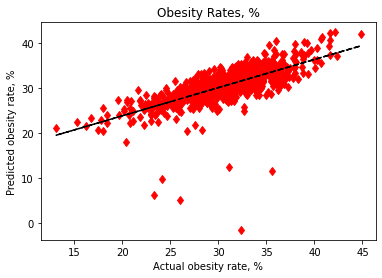

In [131]:
fit = np.polyfit(y_test,ridge.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,ridge.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

# PCA

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [133]:
X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

In [134]:
pca = PCA()

In [135]:
pca.fit_transform(scale(X_train))

array([[-2.25177265e+00,  2.88249836e-01, -1.58422847e+00, ...,
        -5.99860805e-02, -2.33223537e-02, -1.41033819e-02],
       [-3.62219754e+00, -2.71678391e+00, -6.85826123e-01, ...,
        -1.55285829e-01,  1.73218892e-02,  1.08670581e-02],
       [ 2.82431705e+00,  2.00725029e+00, -3.69954613e-01, ...,
         1.82676412e-03,  3.34571760e-03, -8.82811647e-03],
       ...,
       [-1.04480548e+00,  7.89982904e-01, -2.67493177e+00, ...,
        -3.16957498e-02, -3.50078833e-03,  3.12249831e-03],
       [-2.56225445e-01, -1.40652382e-01, -1.33639169e+00, ...,
        -2.84724242e-02, -1.05731863e-03,  1.59834815e-02],
       [ 1.99414734e+00,  9.00313979e-01,  3.30686139e-01, ...,
        -4.97809631e-02,  2.13136448e-02, -4.99970658e-03]])

In [136]:
print(("Explained Variance: %s") % (pca.explained_variance_ratio_))

Explained Variance: [1.51405579e-01 1.09917791e-01 7.76958474e-02 5.82435818e-02
 4.26815005e-02 3.95106928e-02 3.36884011e-02 3.11113104e-02
 3.00305284e-02 2.62582561e-02 2.22774691e-02 2.05175764e-02
 1.82054306e-02 1.80064548e-02 1.72577584e-02 1.64185731e-02
 1.53159054e-02 1.48004371e-02 1.37948493e-02 1.34636768e-02
 1.27380902e-02 1.24670309e-02 1.21821960e-02 1.20517376e-02
 1.12351770e-02 1.06533302e-02 1.02785644e-02 9.83040954e-03
 9.59416523e-03 9.05374439e-03 8.72674189e-03 8.49428938e-03
 8.13297818e-03 7.71439786e-03 7.41879017e-03 7.14384434e-03
 6.48638083e-03 6.17700067e-03 5.73903242e-03 5.55195094e-03
 5.39677476e-03 5.18104547e-03 4.84321528e-03 4.44047542e-03
 4.31382943e-03 4.10172100e-03 3.67354013e-03 3.41443404e-03
 2.52564197e-03 1.80418004e-03 1.56325128e-03 1.36721292e-03
 1.14014285e-03 9.31734641e-04 8.58589754e-04 6.46201252e-04
 4.14233848e-04 3.91926104e-04 3.04146916e-04 2.61809724e-04
 1.20503497e-04 2.49022731e-05 9.01574334e-06]


In [137]:
print ("Explained Variance: (% cumulative)")
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Explained Variance: (% cumulative)


array([15.14, 26.13, 33.9 , 39.72, 43.99, 47.94, 51.31, 54.42, 57.42,
       60.05, 62.28, 64.33, 66.15, 67.95, 69.68, 71.32, 72.85, 74.33,
       75.71, 77.06, 78.33, 79.58, 80.8 , 82.01, 83.13, 84.2 , 85.23,
       86.21, 87.17, 88.08, 88.95, 89.8 , 90.61, 91.38, 92.12, 92.83,
       93.48, 94.1 , 94.67, 95.23, 95.77, 96.29, 96.77, 97.21, 97.64,
       98.05, 98.42, 98.76, 99.01, 99.19, 99.35, 99.49, 99.6 , 99.69,
       99.78, 99.84, 99.88, 99.92, 99.95, 99.98, 99.99, 99.99, 99.99])

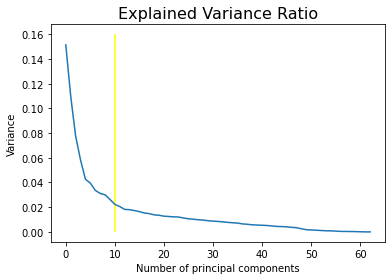

In [138]:
plt.plot(range(63), pca.explained_variance_ratio_)
plt.xlabel('Number of principal components')
plt.ylabel('Variance')
plt.title('Explained Variance Ratio',size=16)
plt.vlines(x=10, ymin=0, ymax=0.16,colors='yellow')

In [139]:
# test lasso with PCA - Mason's advice

X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [140]:
# to transform X_train and X_test
pca = PCA(n_components=10)
X_train_transformed = pca.fit_transform(X_train_std)
X_test_transformed = pca.transform(X_test_std)

In [141]:
# now you can fit the lasso and test performance
lasso = Lasso(alpha = 0.0001)

In [142]:
lasso.fit(X_train_transformed, y_train)

Lasso(alpha=0.0001)

In [143]:
MSE_pca_lasso_train = -np.mean(cross_val_score(lasso, X_train_transformed, y_train, scoring='neg_mean_squared_error', cv=cv))
MSE_pca_lasso_train

7.241702002547652

In [144]:
MSE_pca_lasso = -np.mean(cross_val_score(lasso, X_test_transformed, y_test, scoring='neg_mean_squared_error', cv=cv))
MSE_pca_lasso

10.07467499611622

In [145]:
Performance.loc[-1] = ['Principal Component Lasso', len(X_test_transformed), MSE_pca_lasso]
Performance.index = Performance.index + 1 

Text(0.5, 1.0, 'Obesity Rates, %')

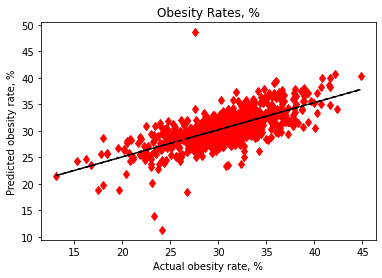

In [146]:
fit = np.polyfit(y_test,lasso.predict(X_test_transformed),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,lasso.predict(X_test_transformed), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

# Feature selection tests

# Recursive Feature Elimination for Linear Regression

In [147]:
from sklearn.feature_selection import RFE
# load data

X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# feature extraction
scores = []
model = LinearRegression()
for i in range(1,64):
    rfe = RFE(model, i)
    fit = rfe.fit(X_train_std, y_train)
    score = -np.mean(cross_val_score(rfe, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
    scores.append(score)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warn

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=33 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=35 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

In [148]:
scores = pd.DataFrame(scores, index=range(1,64),columns=["MSE"])
scores.index.name = 'N of Features'

Text(0.5, 1.0, 'N of Features vs. MSE')

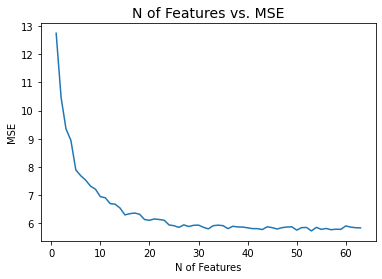

In [149]:
plt.plot(scores.index, scores.MSE)
plt.xlabel('N of Features')
plt.ylabel('MSE')
plt.title('N of Features vs. MSE',size=14)

In [150]:
feature_ranks = rfe.ranking_

In [151]:
ranked_features = pd.DataFrame({'Feature':X_train.columns,'Rank':feature_ranks})
ranked_features.sort_values('Rank',ascending=True,inplace=True)
ranked_features

,Feature,Rank
0,PCT_LACCESS_POP10,1
33,SODA_PRICE10,1
34,MILK_SODA_PRICE10,1
35,PCT_LOCLFARM07,1
36,FMRKTPTH09,1
...,...,...
26,PCT_SFSP09,1
27,PCT_WIC09,1
28,PCT_CACFP09,1
15,PCT_SNAP09,1


In [152]:
ranked_features[ranked_features.Rank<=1].sum()

Feature    PCT_LACCESS_POP10SODA_PRICE10MILK_SODA_PRICE10...
Rank                                                      63
dtype: object

In [153]:
top_features = ranked_features[ranked_features.Rank<=1]['Feature'].values

In [154]:
ranked_features[ranked_features.Rank<=1]['Feature']

0     PCT_LACCESS_POP10
33         SODA_PRICE10
34    MILK_SODA_PRICE10
35       PCT_LOCLFARM07
36           FMRKTPTH09
            ...        
26           PCT_SFSP09
27            PCT_WIC09
28          PCT_CACFP09
15           PCT_SNAP09
62            POPLOSS00
Name: Feature, Length: 63, dtype: object

In [155]:
# test lasso with top features
X_train = data[top_features]
X_test = data_test[top_features]

In [156]:
parameters = {'alpha' : np.linspace(0.0001,100,1000)}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=cv)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000e-04, 1.00200e-01, 2.00300e-01, 3.00400e-01, 4.00500e-01,
       5.00600e-01, 6.00700e-01, 7.00800e-01, 8.00900e-01, 9.01000e-01,
       1.00110e+00, 1.10120e+00, 1.20130e+00, 1.30140e+00, 1.40150e+00,
       1.50160e+00, 1.60170e+00, 1.70180e+00, 1.80190e+00, 1.90200e+00,...
       9.70971e+01, 9.71972e+01, 9.72973e+01, 9.73974e+01, 9.74975e+01,
       9.75976e+01, 9.76977e+01, 9.77978e+01, 9.78979e+01, 9.79980e+01,
       9.80981e+01, 9.81982e+01, 9.82983e+01, 9.83984e+01, 9.84985e+01,
       9.85986e+01, 9.86987e+01, 9.87988e+01, 9.88989e+01, 9.89990e+01,
       9.90991e+01, 9.91992e+01, 9.92993e+01, 9.93994e+01, 9.94995e+01,
       9.95996e+01, 9.96997e+01, 9.97998e+01, 9.98999e+01, 1.00000e+02])})

In [157]:
# get the best performing combo
clf.best_params_

{'alpha': 0.5005999999999999}

In [158]:
ridge = Ridge(alpha=0.1002)

In [159]:
ridge.fit(X_train_std,y_train)

Ridge(alpha=0.1002)

In [160]:
MSE_ridge_rfe = -np.mean(cross_val_score(ridge, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_ridge_rfe

2.1866104094730394

Text(0.5, 1.0, 'Obesity Rates, %')

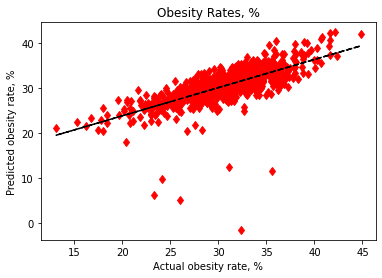

In [161]:
fit = np.polyfit(y_test,ridge.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,ridge.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [162]:
# re-load data

X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [163]:
model = LinearRegression()

In [164]:
# run the model with number of features = 20
rfe = RFE(model,20)
fit = rfe.fit(X_train_std, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [165]:
MSE_rfe = -np.mean(cross_val_score(rfe, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_rfe

2.213842164733234

In [166]:
Performance.loc[-1] = ['Recursive feature elemination_lr', len(X_test.columns), MSE_rfe]
Performance.index = Performance.index + 1 

In [167]:
Performance.sort_values('MSE',ascending=True,inplace=True)
Performance

,Model,n_features,MSE
4,Lasso (alpha=0.0001),63,2.185777
2,Ridge (alpha=0.1002),63,2.186610
0,Recursive feature elemination_lr,63,2.213842
3,Lasso_non collinear_features,34,2.606125
9,Random Forest,63,5.587452
5,Linear Regression_no outliers,23,6.169952
6,Linear Regression,23,9.120051
1,Principal Component Lasso,784,10.074675
7,Linear Regression _all_features,63,11.291271
